<a href="https://colab.research.google.com/github/sarinananya/MLmodels/blob/main/BlackFridaySalePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Black Friday Sale Predictor**

Step1: **Importing required libraries and loaing the dataset**

In [1]:
import pandas as pd
import numpy as np

df= pd.read_csv("https://www.dropbox.com/s/b173516z9mye1z7/BlackFridaySalesPrediction.csv?dl=1")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


Step2: **Data Ananlysis and Visualization**

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


**Observation:** There are 5 features of integer type, 2 of float type and 5 of string type.

In [ ]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [ ]:
n1= (173638/550068) *100
n2= (383247/550068)*100
print(n1)
print(n2)

31.56664266963357
69.67265865311198


**Observation**: Two columns i.e. *Product_Category_2* and *Product_Category_3* contains missing values. These missing values are almost 31.2% and 69.6% of the total dataset respectively

In [3]:
df['Product_Category_2'] =df['Product_Category_2'].fillna(0).astype('int64')
df['Product_Category_3'] =df['Product_Category_3'].fillna(0).astype('int64')

In [ ]:
df.tail(4)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550064,1006035,P00375436,F,26-35,1,C,3,0,20,0,0,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,0,0,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,0,0,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,0,0,490


In [ ]:
#checking the number of unique values in each attribure
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

**Observation:** The number of unique values in 'User_ID' and 'Product_ID' is certainly high, therefore, we will drop these columns

In [4]:
df= df.drop(['User_ID','Product_ID'],axis=1)

In [ ]:
df.head(3)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,0,0,8370
1,F,0-17,10,A,2,0,1,6,14,15200
2,F,0-17,10,A,2,0,12,0,0,1422


# **Analysis based on individual attribute visualization**

# 1. Gender

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


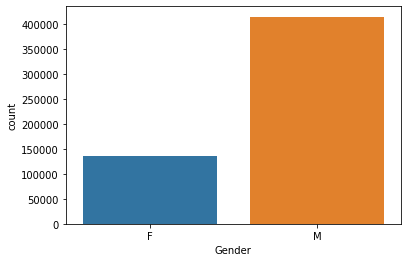

In [5]:
import seaborn as sns
sns.countplot(df['Gender'])

In [ ]:
df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [ ]:
t=414259+ 135809
M= (414259/t)*100
print('percentage of male:')
print(M)
F= 135809/t *100
print('percentage of female')
print(F)

percentage of male:
75.31050706458112
percentage of female
24.689492935418894


**Observation**: According to the above data more number of male members shopped during the black friday sale

In [ ]:
df.groupby("Gender").mean()["Purchase"]

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

**Observation**: Males have spent more money during the black friday sales as compaed to females 

# 2. Occupation

In [ ]:
df['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


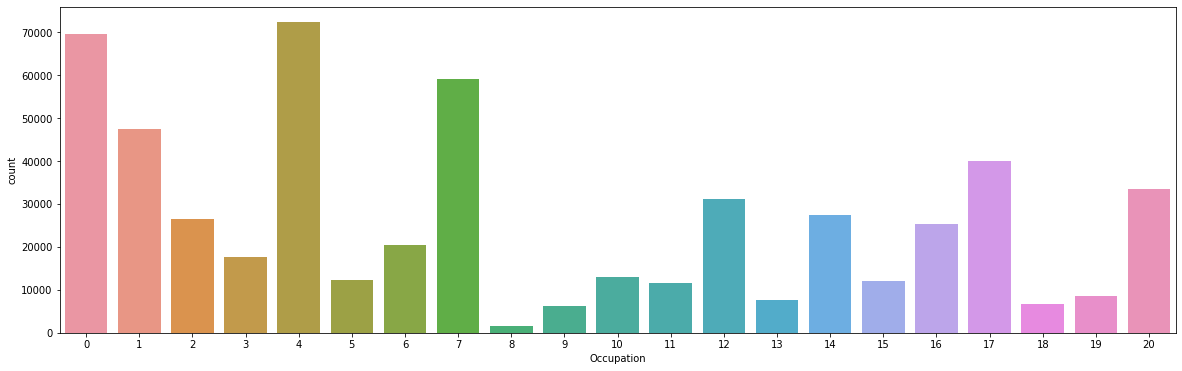

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
sns.countplot(df['Occupation'])
plt.show()

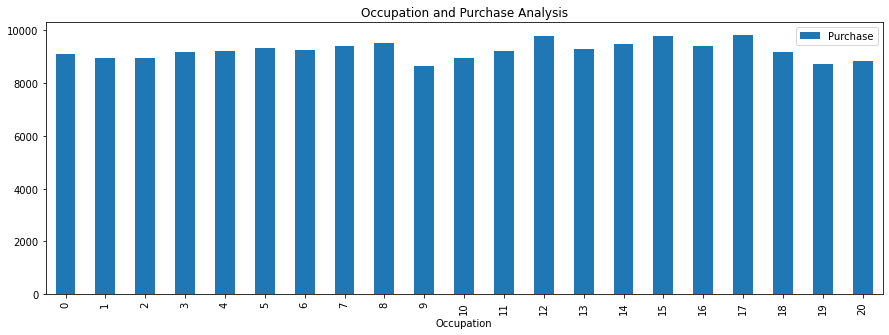

In [ ]:
oc = pd.DataFrame(df.groupby("Occupation").mean()["Purchase"])
oc.plot(kind='bar',figsize=(15,5))
plt.title("Occupation and Purchase Analysis")
plt.show()

//all the occupations depict different roles so we cannot group them or reduce the value in any way//, occupation vs purchase is almost same for all i.e >8000

# 3. Age

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


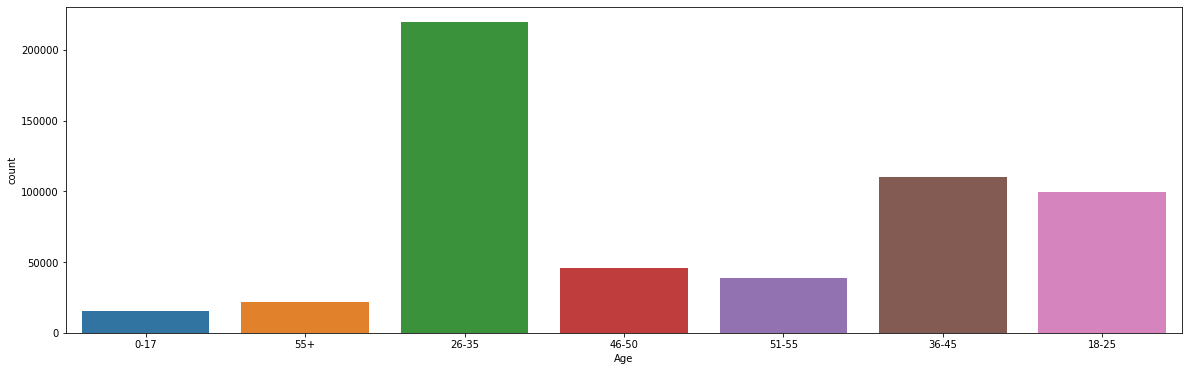

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(df.Age)
plt.show()

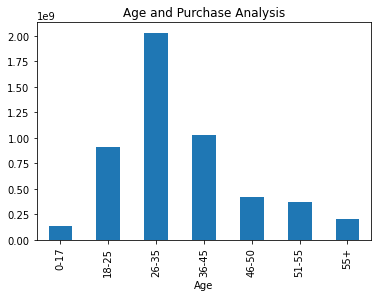

In [ ]:
df.groupby("Age").sum()['Purchase'].plot(kind="bar")
plt.title("Age and Purchase Analysis")
plt.show()

**observation**: maximum number of buyers are in the age range 26-35

In [7]:
df.corr()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Occupation,1.000000,0.024280,-0.007618,0.006712,0.012269,0.020833
Marital_Status,0.024280,1.000000,0.019888,0.001099,-0.004629,-0.000463
Product_Category_1,-0.007618,0.019888,1.000000,-0.067877,-0.385534,-0.343703
Product_Category_2,0.006712,0.001099,-0.067877,1.000000,0.094750,0.052288
Product_Category_3,0.012269,-0.004629,-0.385534,0.094750,1.000000,0.288501
Purchase,0.020833,-0.000463,-0.343703,0.052288,0.288501,1.000000


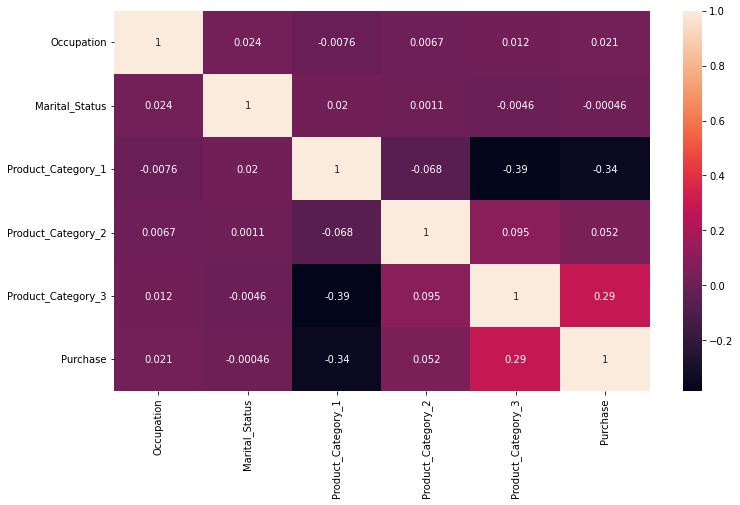

In [8]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

Step3: **Feature Scaling**

In [9]:
x= df.drop('Purchase',axis=1)
y= df['Purchase']

In [19]:
from sklearn.preprocessing import LabelEncoder
lr= LabelEncoder()
df['Gender'] = lr.fit_transform(df['Gender'])
df['Age'] = lr.fit_transform(df['Age'])
df['City_Category'] = lr.fit_transform(df['City_Category'])
df.head(5)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,2,0,0,6702
1,0,0,10,0,2,0,0,5,11,12121
2,0,0,10,0,2,0,11,0,0,586
3,0,0,10,0,2,0,11,13,0,494
4,1,6,16,2,4,0,7,0,0,6301


In [ ]:
#df.tail(20)

Step 4: **Training and Testing**

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.33, random_state=101)

Step 5: **Modelling**

In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

ValueError: ignored